In [ ]:
# Danila Valko
# May 2024
# https://bitcoinvisuals.com/lightning

## setup

In [48]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as plticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sfmt = StrMethodFormatter('{x:,.2f}')
xfmt = ScalarFormatter(useMathText=True)
xfmt.set_powerlimits((0,0))

In [ ]:
!rm -rf ln-review-statistics
!git clone https://github.com/ellariel/ln-review-statistics

## statistics

In [94]:
cap = pd.read_csv('ln-review-statistics/capacity.csv', sep=';', decimal=',')
cap['DateTime'] = pd.to_datetime(cap['DateTime'], utc=True)
cap = cap[cap['DateTime'] >= '01-01-2019']
cap['Year'] = cap['DateTime'].apply(lambda date: date.toordinal())

nod = pd.read_csv('ln-review-statistics/nodes.csv', sep=';', decimal=',')
nod['DateTime'] = pd.to_datetime(nod['DateTime'], utc=True)
nod = nod[nod['DateTime'] >= '01-01-2019']
nod['Year'] = nod['DateTime'].apply(lambda date: date.toordinal())
nod['Nodes'] = nod['Without Channels'] + nod['With Channels']

ch = pd.read_csv('ln-review-statistics/channels.csv', sep=';', decimal=',')
ch['DateTime'] = pd.to_datetime(nod['DateTime'], utc=True)
ch = ch[ch['DateTime'] >= '01-01-2019']
ch['Year'] = ch['DateTime'].apply(lambda date: date.toordinal())
ch['Channels'] = ch['Total.1']

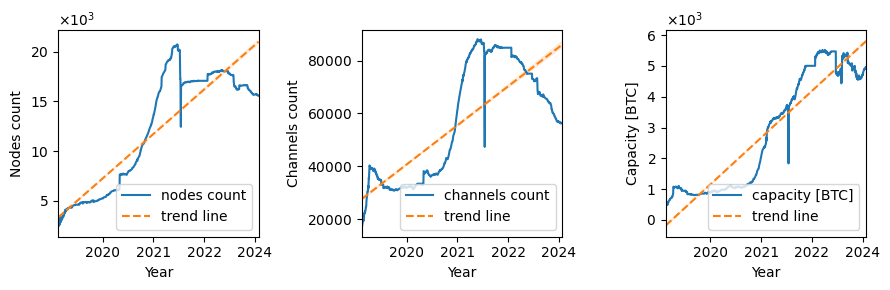

In [140]:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(131)
sns.lineplot(ax=ax, data=nod, x='Year', y='Nodes', label='nodes count')
sns.regplot(ax=ax, data=nod, x='Year', y="Nodes", scatter=False, order=1, label='trend line', line_kws={'ls':'--', 'lw':1.5})
ax.legend(frameon=True, loc='lower right')
ax.set_xlim(nod['Year'].min() - 1, nod['Year'].max() + 1)
new_labels = [date.fromordinal(int(i)).strftime("%Y") for i in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_ylabel('Nodes count')
ax.yaxis.set_major_formatter(xfmt)

ax = fig.add_subplot(132)
sns.lineplot(ax=ax, data=ch, x='Year', y='Channels', label='channels count')
sns.regplot(ax=ax, data=ch, x='Year', y="Channels", scatter=False, order=1, label='trend line', line_kws={'ls':'--', 'lw':1.5})
ax.legend(frameon=True, loc='lower right')
ax.set_xlim(ch['Year'].min() - 1, ch['Year'].max() + 1)
new_labels = [date.fromordinal(int(i)).strftime("%Y") for i in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_ylabel('Channels count')
ax.yaxis.set_major_formatter(xfmt)

ax = fig.add_subplot(133)
sns.lineplot(ax=ax, data=cap, x='Year', y='BTC', label='capacity [BTC]')
sns.regplot(ax=ax, data=cap, x='Year', y="BTC", scatter=False, order=1, label='trend line', line_kws={'ls':'--', 'lw':1.5})
ax.legend(frameon=True, loc='lower right')
ax.set_xlim(cap['Year'].min() - 1, cap['Year'].max() + 1)
new_labels = [date.fromordinal(int(i)).strftime("%Y") for i in ax.get_xticks()]
ax.set_xticklabels(new_labels)
ax.set_ylabel('Capacity [BTC]')
ax.yaxis.set_major_formatter(xfmt)

fig.tight_layout()
plt.savefig('fig00.pdf', format='pdf')